## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
from tensorflow.python import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\pyth

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.python.keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
       

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [5e-2, 15e-2, 2e-1, 25e-2, 3e-1]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.3f" % (drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0) 
    #optimizer = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
    #optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "drp_ratio-%s" % str(drp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Dropout = 0.050
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          

50000/50000 [==============================] - 5s 96us/sample - loss: 1.0028 - accuracy: 0.6403 - val_loss: 1.3916 - val_accuracy: 0.5290
Epoch 44/50
50000/50000 [==============================] - 4s 78us/sample - loss: 0.9933 - accuracy: 0.6426 - val_loss: 1.4092 - val_accuracy: 0.5263
Epoch 45/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.9935 - accuracy: 0.6436 - val_loss: 1.4043 - val_accuracy: 0.5296
Epoch 46/50
50000/50000 [==============================] - 5s 101us/sample - loss: 0.9961 - accuracy: 0.6413 - val_loss: 1.4062 - val_accuracy: 0.5232
Epoch 47/50
50000/50000 [==============================] - 5s 104us/sample - loss: 0.9806 - accuracy: 0.6469 - val_loss: 1.3982 - val_accuracy: 0.5297
Epoch 48/50
50000/50000 [==============================] - 5s 101us/sample - loss: 0.9644 - accuracy: 0.6512 - val_loss: 1.4187 - val_accuracy: 0.5363
Epoch 49/50
50000/50000 [==============================] - 5s 97us/sample - loss: 0.9604 - accuracy: 0.6544 -

50000/50000 [==============================] - 5s 106us/sample - loss: 1.3219 - accuracy: 0.5249 - val_loss: 1.3848 - val_accuracy: 0.5024
Epoch 38/50
50000/50000 [==============================] - 5s 104us/sample - loss: 1.3082 - accuracy: 0.5281 - val_loss: 1.3791 - val_accuracy: 0.5095
Epoch 39/50
50000/50000 [==============================] - 5s 104us/sample - loss: 1.3094 - accuracy: 0.5280 - val_loss: 1.3711 - val_accuracy: 0.5130
Epoch 40/50
50000/50000 [==============================] - 5s 107us/sample - loss: 1.3009 - accuracy: 0.5333 - val_loss: 1.3640 - val_accuracy: 0.5131
Epoch 41/50
50000/50000 [==============================] - 5s 103us/sample - loss: 1.3004 - accuracy: 0.5331 - val_loss: 1.3667 - val_accuracy: 0.5121
Epoch 42/50
50000/50000 [==============================] - 5s 104us/sample - loss: 1.2944 - accuracy: 0.5352 - val_loss: 1.3817 - val_accuracy: 0.5029
Epoch 43/50
50000/50000 [==============================] - 5s 107us/sample - loss: 1.2919 - accuracy: 0.53

50000/50000 [==============================] - 5s 98us/sample - loss: 1.4738 - accuracy: 0.4707 - val_loss: 1.4385 - val_accuracy: 0.4853
Epoch 32/50
50000/50000 [==============================] - 4s 89us/sample - loss: 1.4724 - accuracy: 0.4707 - val_loss: 1.4438 - val_accuracy: 0.4789
Epoch 33/50
50000/50000 [==============================] - 5s 101us/sample - loss: 1.4708 - accuracy: 0.4698 - val_loss: 1.4453 - val_accuracy: 0.4858
Epoch 34/50
50000/50000 [==============================] - 5s 98us/sample - loss: 1.4570 - accuracy: 0.4767 - val_loss: 1.4405 - val_accuracy: 0.4879
Epoch 35/50
50000/50000 [==============================] - 5s 100us/sample - loss: 1.4562 - accuracy: 0.4750 - val_loss: 1.4531 - val_accuracy: 0.4812
Epoch 36/50
50000/50000 [==============================] - 5s 100us/sample - loss: 1.4627 - accuracy: 0.4746 - val_loss: 1.4428 - val_accuracy: 0.4895
Epoch 37/50
50000/50000 [==============================] - 5s 101us/sample - loss: 1.4514 - accuracy: 0.4786 

50000/50000 [==============================] - 5s 107us/sample - loss: 1.5659 - accuracy: 0.4389 - val_loss: 1.4994 - val_accuracy: 0.4721
Epoch 26/50
50000/50000 [==============================] - 5s 99us/sample - loss: 1.5642 - accuracy: 0.4383 - val_loss: 1.4776 - val_accuracy: 0.4782
Epoch 27/50
50000/50000 [==============================] - 5s 103us/sample - loss: 1.5533 - accuracy: 0.4440 - val_loss: 1.5257 - val_accuracy: 0.4646
Epoch 28/50
50000/50000 [==============================] - 5s 105us/sample - loss: 1.5572 - accuracy: 0.4404 - val_loss: 1.5049 - val_accuracy: 0.4740
Epoch 29/50
50000/50000 [==============================] - 4s 87us/sample - loss: 1.5463 - accuracy: 0.4431 - val_loss: 1.4816 - val_accuracy: 0.4805
Epoch 30/50
50000/50000 [==============================] - 5s 105us/sample - loss: 1.5406 - accuracy: 0.4459 - val_loss: 1.4925 - val_accuracy: 0.4776
Epoch 31/50
50000/50000 [==============================] - 5s 105us/sample - loss: 1.5326 - accuracy: 0.4499

50000/50000 [==============================] - 5s 104us/sample - loss: 1.6621 - accuracy: 0.3985 - val_loss: 1.5718 - val_accuracy: 0.4405
Epoch 20/50
50000/50000 [==============================] - 5s 102us/sample - loss: 1.6479 - accuracy: 0.4028 - val_loss: 1.5774 - val_accuracy: 0.4514
Epoch 21/50
50000/50000 [==============================] - 5s 104us/sample - loss: 1.6470 - accuracy: 0.4031 - val_loss: 1.5757 - val_accuracy: 0.4429
Epoch 22/50
50000/50000 [==============================] - 5s 106us/sample - loss: 1.6397 - accuracy: 0.4069 - val_loss: 1.5638 - val_accuracy: 0.4449
Epoch 23/50
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6388 - accuracy: 0.4088 - val_loss: 1.5670 - val_accuracy: 0.4426
Epoch 24/50
50000/50000 [==============================] - 5s 105us/sample - loss: 1.6336 - accuracy: 0.4107 - val_loss: 1.5851 - val_accuracy: 0.4396
Epoch 25/50
50000/50000 [==============================] - 5s 108us/sample - loss: 1.6305 - accuracy: 0.41

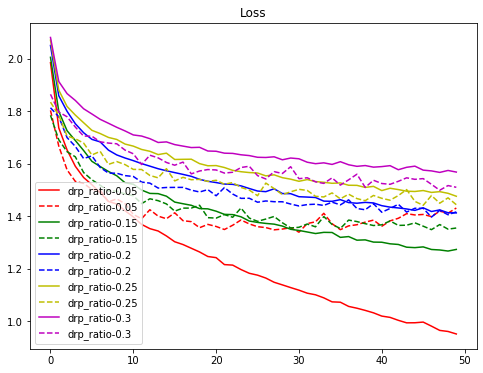

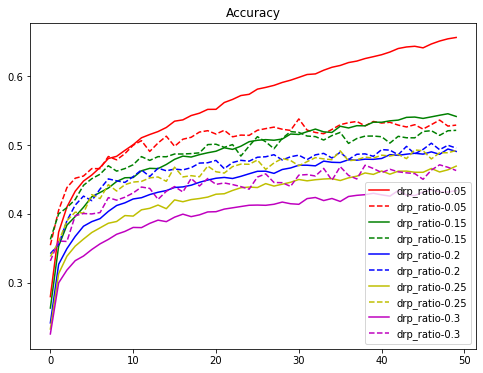

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()